<a href="https://colab.research.google.com/github/AbdNasir24/Resume_Analyser/blob/main/DataFrames_from_CSVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


filenames = [
    "01_people.csv",
    "02_abilities.csv",
    "03_education.csv",
    "04_experience.csv",
    "05_person_skills.csv",
    "06_skills.csv"
]

resume_data = {}


for filename in filenames:
    try:

        df_name = filename.split('_', 1)[1].replace('.csv', '') + "_df"
        if filename.startswith("01_"):
             df_name = "people_df"
        elif filename.startswith("02_"):
             df_name = "abilities_df"
        elif filename.startswith("03_"):
             df_name = "education_df"
        elif filename.startswith("04_"):
             df_name = "experience_df"
        elif filename.startswith("05_"):
             df_name = "person_skills_df"
        elif filename.startswith("06_"):
             df_name = "skills_df"

        resume_data[df_name] = pd.read_csv(filename)
        print(f"Successfully loaded {filename} into DataFrame: {df_name}")
    except FileNotFoundError:
        print(f"Error: The file {filename} was not found. Please ensure it's in the same directory as the script or provide the full path.")
    except Exception as e:
        print(f"An error occurred while reading {filename}: {e}")

print("\n--- Displaying the head of each DataFrame ---")
for name, df in resume_data.items():
    print(f"\nHead of {name}:")
    print(df.head())

Successfully loaded 01_people.csv into DataFrame: people_df
Successfully loaded 02_abilities.csv into DataFrame: abilities_df
Successfully loaded 03_education.csv into DataFrame: education_df
Successfully loaded 04_experience.csv into DataFrame: experience_df
Successfully loaded 05_person_skills.csv into DataFrame: person_skills_df
Successfully loaded 06_skills.csv into DataFrame: skills_df

--- Displaying the head of each DataFrame ---

Head of people_df:
   person_id                                               name email phone  \
0          1                             Database Administrator   NaN   NaN   
1          2                             Database Administrator   NaN   NaN   
2          3                      Oracle Database Administrator   NaN   NaN   
3          4  Amazon Redshift Administrator and ETL Develope...   NaN   NaN   
4          5             Scrum Master Scrum Master Scrum Master   NaN   NaN   

  linkedin  
0      NaN  
1      NaN  
2      NaN  
3      NaN  

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226760 entries, 0 to 226759
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   skill   226758 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [3]:
df.head()

,skill
0,Mongo DB-3.2
1,JNDI LDAP
2,Stored Procedures
3,Perform ad-hoc analysis
4,Monitored and resolved flight crew legality is...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226760 entries, 0 to 226759
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   skill   226758 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [5]:
# null values check
print("\n--- Checking for null values in each DataFrame ---")
for name, df in resume_data.items():
    print(f"\nNull values in {name}:")
    print(df.isnull().sum())



--- Checking for null values in each DataFrame ---

Null values in people_df:
person_id        0
name           114
email        53340
phone        53100
linkedin     46395
dtype: int64

Null values in abilities_df:
person_id    0
ability      0
dtype: int64

Null values in education_df:
person_id          0
institution     1569
program         7761
start_date     21129
location       23256
dtype: int64

Null values in experience_df:
person_id         0
title           111
firm           4203
start_date     2262
end_date       2724
location      53055
dtype: int64

Null values in person_skills_df:
person_id    0
skill        9
dtype: int64

Null values in skills_df:
skill    2
dtype: int64


In [6]:
df.isnull().sum()

,0
skill,2


In [7]:

def categorize_job(title):

    if pd.isna(title) or title is None:
        return 'unknown'

    title = str(title).lower()


    categories = {
        'data science & analytics': ['data scientist', 'data analyst', 'bi', 'business intelligence', 'data engineer', 'etl'],
        'software development & engineering': ['developer', 'engineer', 'software', 'programmer', 'web developer', 'frontend', 'backend', 'full stack'],
        'devops & cloud': ['devops', 'cloud', 'aws', 'azure', 'gcp', 'sre', 'site reliability'],
        'cybersecurity': ['security', 'cyber', 'infosec', 'pentest', 'ethical hacker'],
        'database administration': ['database', 'dba', 'sql', 'oracle', 'mongodb', 'postgresql', 'mysql', 'redshift'],
        'networking': ['network', 'ccna', 'ccnp', 'cisco', 'wan', 'lan'],
        'system administration': ['system admin', 'sysadmin', 'windows server', 'linux admin'],
        'it support': ['support', 'helpdesk', 'service desk', 'it specialist', 'desktop support'],
        'project management': ['project manager', 'scrum master', 'agile coach', 'product owner']
    }


    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'other'


In [8]:
if 'people_df' in resume_data:
    resume_data['people_df']['category'] = resume_data['people_df']['name'].apply(categorize_job)
    print("\n--- People DataFrame with Categories ---")
    print(resume_data['people_df'][['name', 'category']].head(10))


--- People DataFrame with Categories ---
                                                name  \
0                             Database Administrator   
1                             Database Administrator   
2                      Oracle Database Administrator   
3  Amazon Redshift Administrator and ETL Develope...   
4             Scrum Master Scrum Master Scrum Master   
5                      Oracle Database Administrator   
6                      Oracle Database Administrator   
7              Lead Database Administrator/Developer   
8                          Dominion Diagnostics, LLC   
9                      Oracle Database Administrator   

                             category  
0             database administration  
1             database administration  
2             database administration  
3            data science & analytics  
4                  project management  
5             database administration  
6             database administration  
7  software developme

In [9]:
if 'experience_df' in resume_data:
    resume_data['experience_df']['category'] = resume_data['experience_df']['title'].apply(categorize_job)
    print("\n--- Experience DataFrame with Categories ---")
    print(resume_data['experience_df'][['title', 'category']].head(10))


--- Experience DataFrame with Categories ---
                                               title                  category
0                             Database Administrator   database administration
1                             Database Administrator   database administration
2                             Database Administrator   database administration
3                      Oracle Database Administrator   database administration
4                      Oracle Database Administrator   database administration
5  Amazon Redshift Administrator and ETL Develope...  data science & analytics
6                             Database Administrator   database administration
7                             Database Administrator   database administration
8                                       Scrum Master        project management
9        Oracle Database Administrator/ Scrum Master   database administration


In [10]:
if 'people_df' in resume_data:
    print("\n--- Category Distribution in People DataFrame ---")
    print(resume_data['people_df']['category'].value_counts())


--- Category Distribution in People DataFrame ---
category
other                                 20379
software development & engineering    16731
cybersecurity                          4197
database administration                4161
networking                             3414
project management                     3267
it support                             1179
data science & analytics                978
system administration                   330
devops & cloud                          183
unknown                                 114
Name: count, dtype: int64


In [11]:
if 'experience_df' in resume_data:
    print("\n--- Category Distribution in Experience DataFrame ---")
    print(resume_data['experience_df']['category'].value_counts())


--- Category Distribution in Experience DataFrame ---
category
software development & engineering    92697
other                                 84003
database administration               18657
project management                    18393
cybersecurity                         16920
networking                            16293
it support                            11694
data science & analytics               4101
system administration                  2142
devops & cloud                          393
unknown                                 111
Name: count, dtype: int64


In [12]:

print("\n--- Basic Information about each DataFrame ---")
for name, df in resume_data.items():
    print(f"\n{name} Info:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes}")


--- Basic Information about each DataFrame ---

people_df Info:
Shape: (54933, 6)
Columns: ['person_id', 'name', 'email', 'phone', 'linkedin', 'category']
Data types:
person_id     int64
name         object
email        object
phone        object
linkedin     object
category     object
dtype: object

abilities_df Info:
Shape: (1219473, 2)
Columns: ['person_id', 'ability']
Data types:
person_id     int64
ability      object
dtype: object

education_df Info:
Shape: (75999, 5)
Columns: ['person_id', 'institution', 'program', 'start_date', 'location']
Data types:
person_id       int64
institution    object
program        object
start_date     object
location       object
dtype: object

experience_df Info:
Shape: (265404, 7)
Columns: ['person_id', 'title', 'firm', 'start_date', 'end_date', 'location', 'category']
Data types:
person_id      int64
title         object
firm          object
start_date    object
end_date      object
location      object
category      object
dtype: object

perso

<ipython-input-13-b5b214cb2eb3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=people_counts.values, y=people_counts.index, palette='viridis')


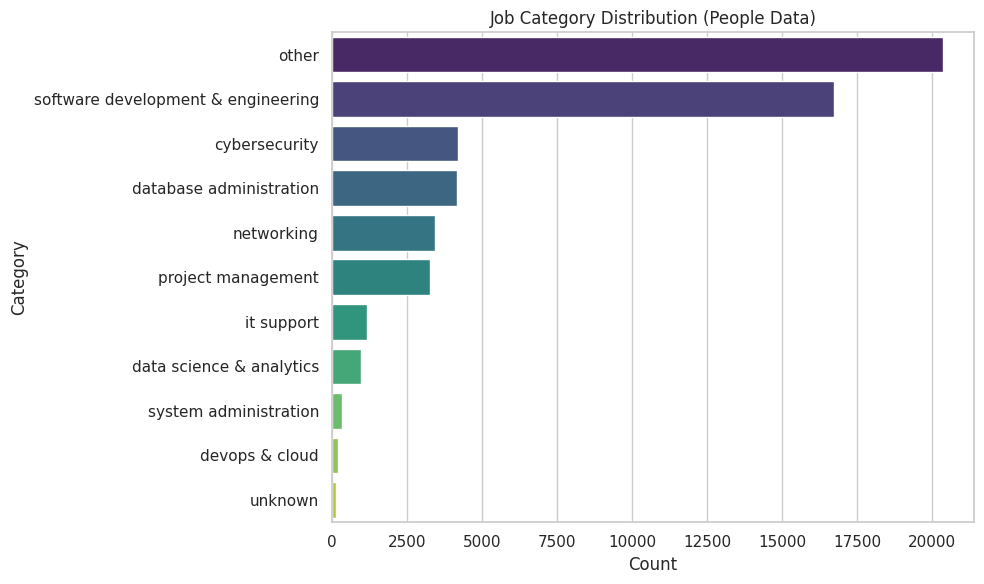

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
if 'people_df' in resume_data:
    people_counts = resume_data['people_df']['category'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=people_counts.values, y=people_counts.index, palette='viridis')
    plt.title('Job Category Distribution (People Data)')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()